In [2]:
import torch

x = torch.randn(3,1,5,4)
print(x.shape)

conv = torch.nn.Conv2d(1,4,(2,3))
res = conv(x)

print(res.shape)    # torch.Size([3, 4, 4, 2])

 

torch.Size([3, 1, 5, 4])
torch.Size([3, 4, 4, 2])


In [4]:
x = torch.ones(3,1,5,4)
print(x.shape , x )

conv = torch.nn.Conv2d(1,4,(2,3))
res = conv(x)

print(res.shape,res)    # torch.Size([3, 4, 4, 2])

torch.Size([3, 1, 5, 4]) tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])
torch.Size([3, 4, 4, 2]) tensor([[[[ 0.4525,  0.4525],
          [ 0.4525,  0.4525],
          [ 0.4525,  0.4525],
          [ 0.4525,  0.4525]],

         [[ 0.7874,  0.7874],
          [ 0.7874,  0.7874],
          [ 0.7874,  0.7874],
          [ 0.7874,  0.7874]],

         [[-0.2795, -0.2795],
          [-0.2795, -0.2795],
          [-0.2795, -0.2795],
          [-0.2795, -0.2795]],

         [[ 0.7729,  0.7729],
          [ 0.7729,  0.7729],
          [ 0.7729,  0.7729],
          [ 0.7729,  0.7729]]],


        [[[ 0.4525,  0.4525],

#  卷积练习

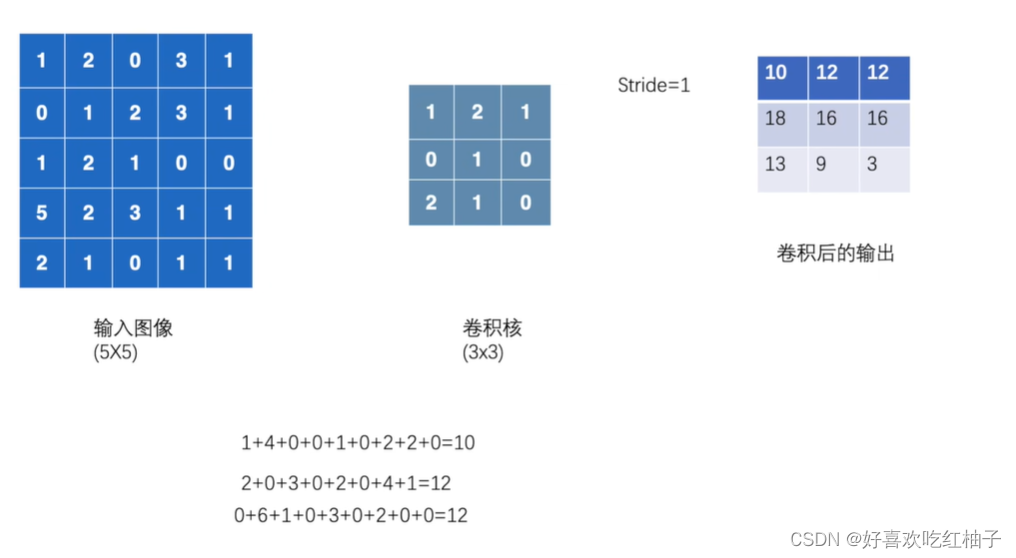

In [7]:

import torch.nn.functional as F
# 输入
input = torch.tensor([[1,2,0,3,1],
                      [0,1,2,3,1],
                      [1,2,1,0,0],
                      [5,2,3,1,1],
                      [2,1,0,1,1]])
 
# 卷积核
kernel = torch.tensor([[1,2,1],
                       [0,1,0],
                       [2,1,0]])
 
print(input.shape)
print(kernel.shape)
 
# 重新定义尺寸，把尺寸改成四个数，1个batchsize，1个通道，长和宽和之前一样
input = torch.reshape(input,(1,1,5,5))
kernel = torch.reshape(kernel,(1,1,3,3))
 
print(input.shape)
print(kernel.shape)
 
output = F.conv2d(input,kernel)
print(output)

torch.Size([5, 5])
torch.Size([3, 3])
torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])
tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


#   不同stride的对比  
 步长（stride）：

卷积核是在图片上移动后遍历每一个像素，每次移动的大小就是步长stride

# 不同padding的对比
padding（填充）：

 习惯上，我们可以使用0来对图像进行填充。规定p( padding )代表填充的层数。

是为了满足输出的图像的维度要求，最终图像的输出宽度会=原来输出宽度+2padding，因为是周围填充

In [9]:

#stride=1或2时的输出
output1 = F.conv2d(input,kernel,stride=1)
print(output1)
output2 = F.conv2d(input,kernel,stride=2)
print(output2)
 
# padding=1或2时的
output3 = F.conv2d(input,kernel,stride=1,padding=1)
print(output3)
output4 = F.conv2d(input,kernel,stride=1,padding=2)
print(output4) 

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])
tensor([[[[10, 12],
          [13,  3]]]])
tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])
tensor([[[[ 0,  1,  4,  4,  3,  7,  2],
          [ 0,  1,  3,  4, 10,  8,  2],
          [ 1,  5, 10, 12, 12,  6,  1],
          [ 0,  7, 18, 16, 16,  8,  3],
          [ 1, 11, 13,  9,  3,  4,  2],
          [ 5, 14, 13,  9,  7,  4,  1],
          [ 2,  5,  4,  2,  3,  3,  1]]]])


In [18]:
# 输入
input = torch.tensor([[1,1,1,1]])
 
# 卷积核
kernel = torch.tensor([[1]])
 
print(input.shape)
print(kernel.shape)
 
# 重新定义尺寸，把尺寸改成四个数，1个batchsize，1个通道，长和宽和之前一样
input = torch.reshape(input,(1,1,2,2))
kernel = torch.reshape(kernel,(1,1,1,1))
#stride=1或2时的输出
output1 = F.conv2d(input,kernel)
print(output1)
# padding=1或2时的
output3 = F.conv2d(input,kernel,padding=1)
print(output3)

output4 = F.conv2d(input,kernel,stride=1,padding=2)
print(output4) 

torch.Size([1, 4])
torch.Size([1, 1])
tensor([[[[1, 1],
          [1, 1]]]])
tensor([[[[0, 0, 0, 0],
          [0, 1, 1, 0],
          [0, 1, 1, 0],
          [0, 0, 0, 0]]]])
tensor([[[[0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 1, 1, 0, 0],
          [0, 0, 1, 1, 0, 0],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0]]]])


In [ ]:
# 输入
input = torch.tensor([[1]])
 
# 卷积核
kernel = torch.tensor([[1]])
 
print(input.shape)
print(kernel.shape)
 
# 重新定义尺寸，把尺寸改成四个数，1个batchsize，1个通道，长和宽和之前一样
input = torch.reshape(input,(1,1,1,1))
kernel = torch.reshape(kernel,(1,1,1,1))
#stride=1或2时的输出
output1 = F.conv2d(input,kernel)
print(output1)
# padding=1或2时的
output3 = F.conv2d(input,kernel,padding=1)
print(output3)

output4 = F.conv2d(input,kernel,stride=1,padding=2)
print(output4) 

In [19]:
# 输入
input = torch.tensor([[1,1,1,1]])
 
# 卷积核
kernel = torch.tensor([[1,1,1,1]])
 
print(input.shape)
print(kernel.shape)
 
# 重新定义尺寸，把尺寸改成四个数，1个batchsize，1个通道，长和宽和之前一样
input = torch.reshape(input,(1,1,2,2))
kernel = torch.reshape(kernel,(1,1,2,2))
#stride=1或2时的输出
output1 = F.conv2d(input,kernel)
print(output1)
# padding=1或2时的
'''
[0 0 0 0                                         
 0 1 1 0          *   [ 1,1
 0 1 1 0                1,1]        = 
 0 1 1 0 ]

 [1, 2, 1],
 [2, 4, 2],
 [1, 2, 1]

'''
output3 = F.conv2d(input,kernel,padding=1)
print(output3)

output4 = F.conv2d(input,kernel,stride=1,padding=2)
print(output4) 

torch.Size([1, 4])
torch.Size([1, 4])
tensor([[[[4]]]])
tensor([[[[1, 2, 1],
          [2, 4, 2],
          [1, 2, 1]]]])
tensor([[[[0, 0, 0, 0, 0],
          [0, 1, 2, 1, 0],
          [0, 2, 4, 2, 0],
          [0, 1, 2, 1, 0],
          [0, 0, 0, 0, 0]]]])
